# **Advertisement Click Prediction**

In this notebook we will look at the theory behind Logistic Regression and use it to indicating whether or not a particular internet user clicks on an Advertisement based off the features of that user.

This dataset contains information related to consumer behavior and advertisement engagement. Here are the features included:

- `Daily Time Spent on Site`: Duration of consumer's visit to the website in minutes.
- `Age`: Age of the consumer in years.
- `Area Income`: Average income of the geographical area where the consumer resides.
- `Daily Internet Usage`: Average minutes per day spent by the consumer on the internet.
- `Ad Topic Line`: Headline of the advertisement.
- `City`: City of the consumer.
- `Male`: Binary variable indicating whether the consumer is male (1) or not (0).
- `Country`: Country of the consumer.
- `Timestamp`: Time at which the consumer clicked on the ad or closed the window.
- `Clicked on Ad`: Binary variable indicating whether the consumer clicked on the ad (1) or not (0).

This dataset can be found on [Kaggle](https://www.kaggle.com/datasets/gabrielsantello/advertisement-click-on-ad).

In [1]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

# Import packages for statistical analysis/hypothesis testing
from scipy import stats
import statsmodels.api as sm

# Load dataset into dataframe
data = pd.read_csv("advertising.csv")

In [2]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [3]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [4]:
data.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [5]:
data['Clicked on Ad'].value_counts()

Clicked on Ad
0    500
1    500
Name: count, dtype: int64

### **Exploratory Data Analysis**

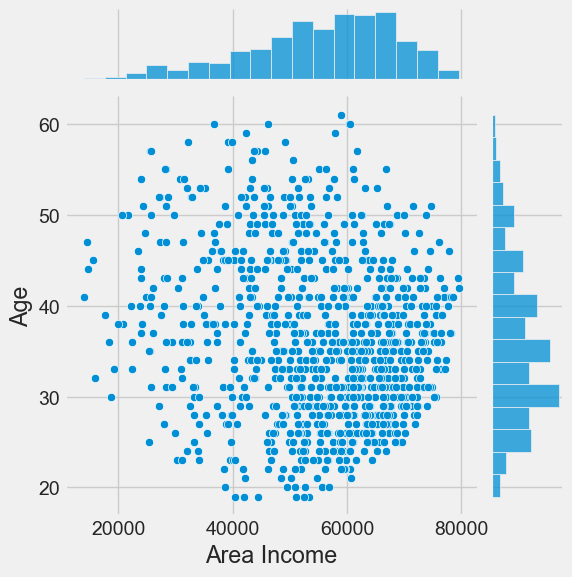

In [6]:
sns.jointplot(x = data['Area Income'],y=data['Age'])

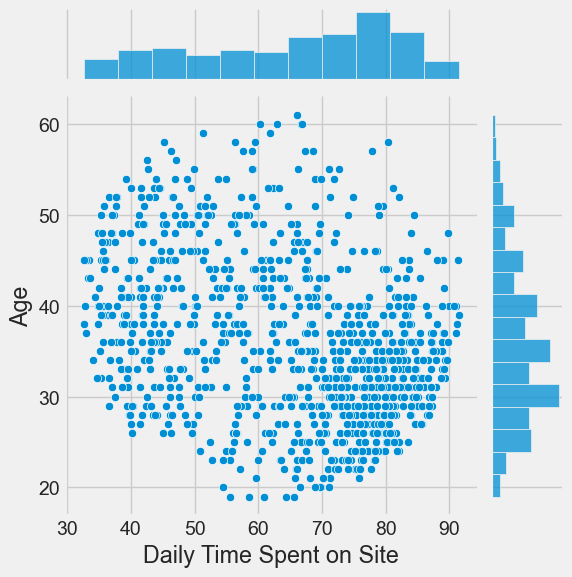

In [7]:
sns.jointplot(x=data['Daily Time Spent on Site'],y=data['Age'])

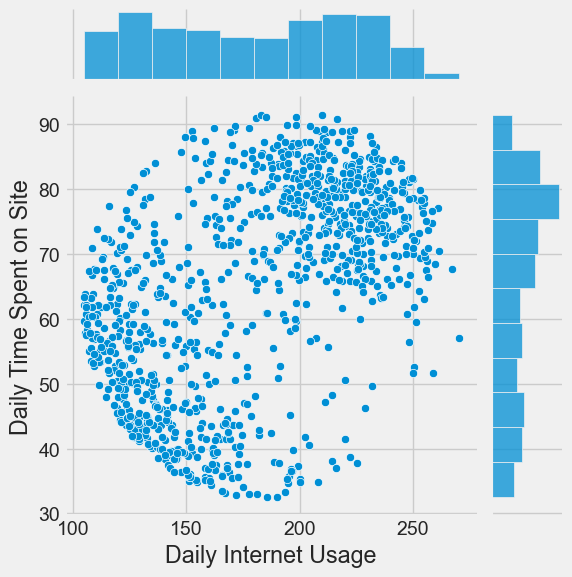

In [8]:
sns.jointplot(x=data['Daily Internet Usage'],y=data['Daily Time Spent on Site'])

### **Feature Selection**

c:\Users\sa\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\sa\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


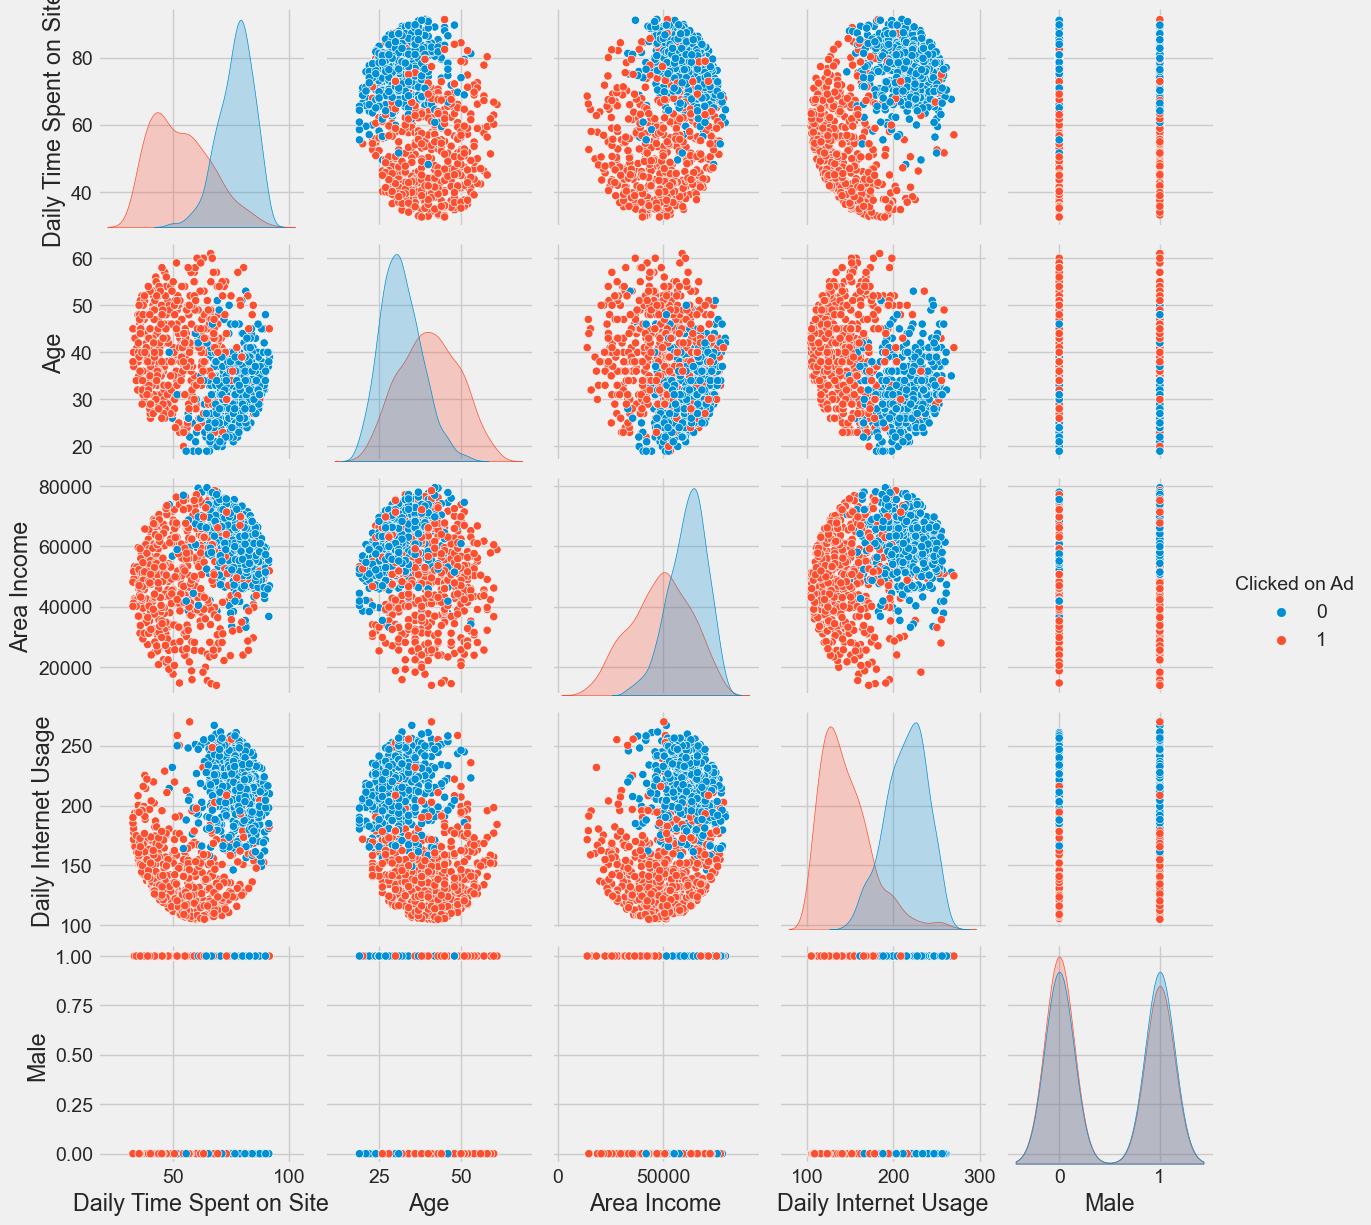

In [9]:
sns.pairplot(data, hue='Clicked on Ad',size=2.5)

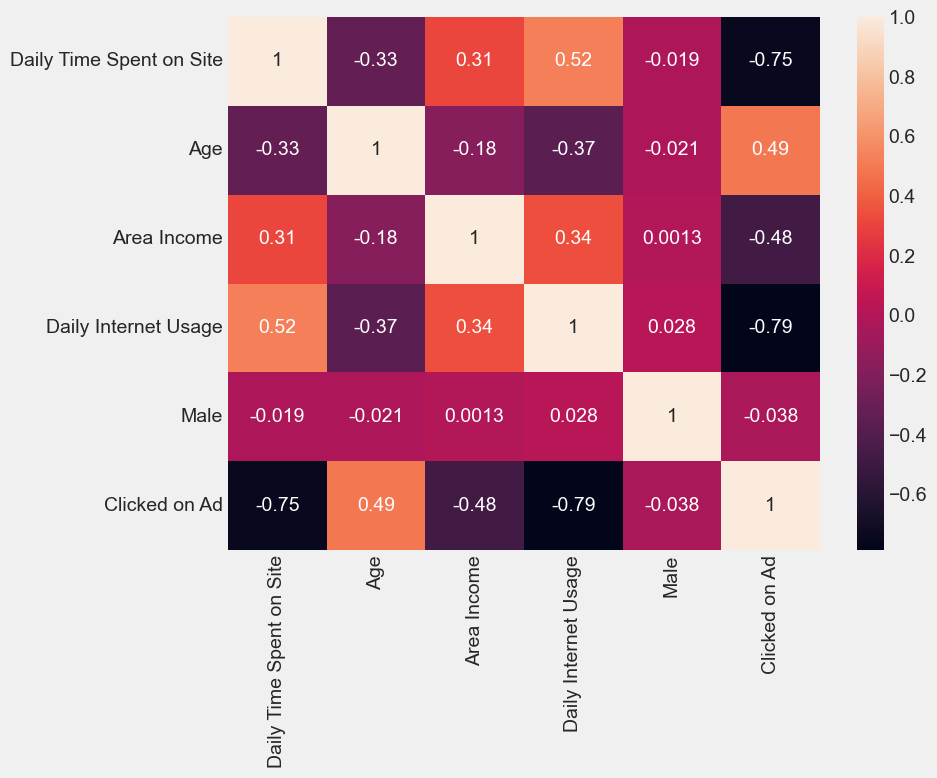

In [10]:
filtered_data = data.select_dtypes(exclude='object')
correlation = filtered_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, 
            annot=True)
plt.tight_layout()              # Adjust layout to make sure everything fits without overlapping
plt.show()


### **Implimenting Logistic Regression in Scikit-Learn**

In [11]:
# Import packages for machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [12]:
y = data['Clicked on Ad']
X = data.drop(['Timestamp', 'Clicked on Ad', 'Ad Topic Line', 'Country', 'City'], axis=1)
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [20]:
reg_log = LogisticRegression(max_iter=1000)
reg_log.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

### **Performance Measurement**

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train == True:
        pred = reg_log.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [32]:
print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:
Accuracy Score: 97.31%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.967836    0.978659  0.973134    0.973247      0.973199
recall       0.979290    0.966867  0.973134    0.973079      0.973134
f1-score     0.973529    0.972727  0.973134    0.973128      0.973132
support    338.000000  332.000000  0.973134  670.000000    670.000000
_______________________________________________
Confusion Matrix: 
 [[331   7]
 [ 11 321]]



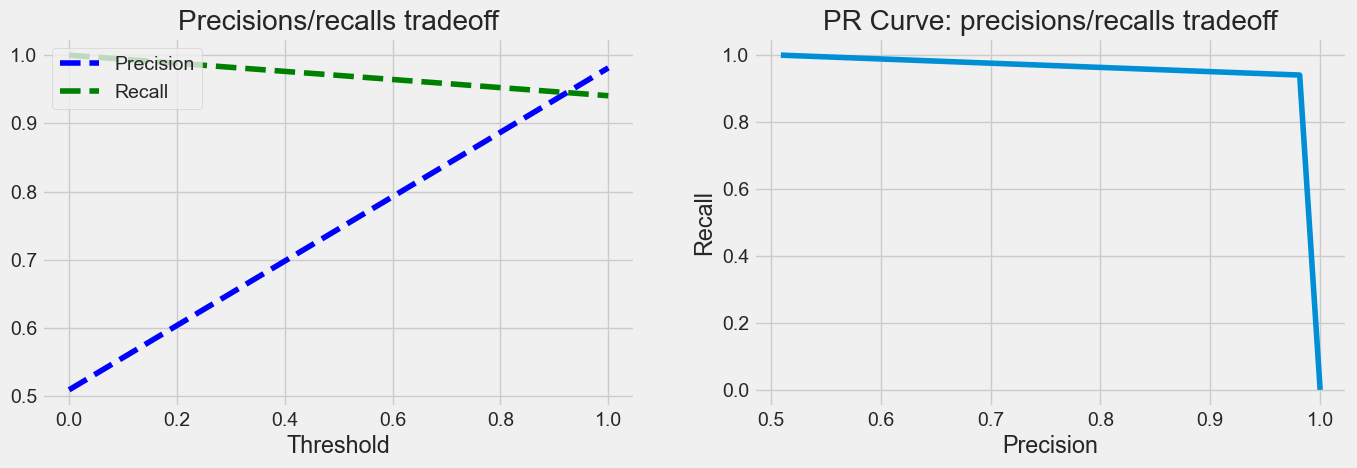

In [33]:
from sklearn.metrics import precision_recall_curve


def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.title("Precisions/recalls tradeoff")

    
precisions, recalls, thresholds = precision_recall_curve(y_test, lr_clf.predict(X_test))


plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(2, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

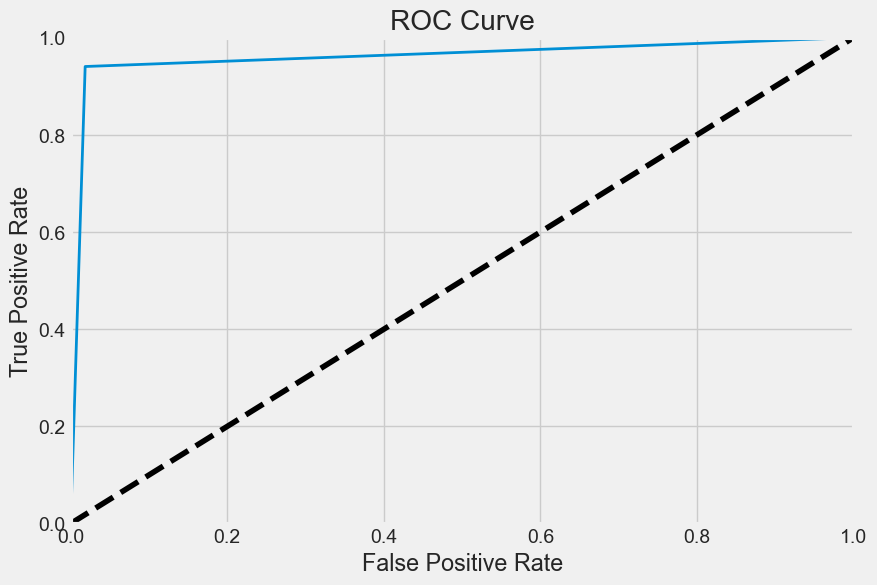

In [34]:
from sklearn.metrics import roc_curve

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

fpr, tpr, thresholds = roc_curve(y_test, lr_clf.predict(X_test))
plt.figure(figsize=(9,6)); 
plot_roc_curve(fpr, tpr)
plt.show();

### **Hyperparameter tuning**

In [35]:
from sklearn.model_selection import GridSearchCV

In [37]:
lr_clf = LogisticRegression()

lr_cv = GridSearchCV(
    estimator=lr_clf, 
    param_grid=param_grid, 
    scoring='f1',
    verbose=1, 
    n_jobs=-1, 
    cv=10
)

lr_cv.fit(X_train, y_train)
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")

lr_clf = LogisticRegression(**best_params)
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)


Fitting 10 folds for each of 64 candidates, totalling 640 fits
Best parameters: {'C': 0.8, 'class_weight': {1: 0.6, 0: 0.4}, 'penalty': 'l1', 'solver': 'liblinear'}
Train Result:
Accuracy Score: 97.31%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.967836    0.978659  0.973134    0.973247      0.973199
recall       0.979290    0.966867  0.973134    0.973079      0.973134
f1-score     0.973529    0.972727  0.973134    0.973128      0.973132
support    338.000000  332.000000  0.973134  670.000000    670.000000
_______________________________________________
Confusion Matrix: 
 [[331   7]
 [ 11 321]]

Test Result:
Accuracy Score: 96.36%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.946429    0.981481  0.963636    0.963955      0.964274
recall       0.981481    0.946429  0.9